In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [135]:
data = pd.read_csv("Data\Cleveland_hd.csv")

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [136]:
data.shape

(303, 14)


<p>The full data dictionary is also displayed here.</p>
<p><img src="https://assets.datacamp.com/production/project_445/img/datadict.png" height="500" width="500"></p>

## Lets Check if there are any null values

In [137]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
class       0
dtype: int64

## 6 Null values are there , 4 in ca and 2 thal. Checking the distirbituons of these variables.

In [138]:
data[data.ca.isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [139]:
data[data.thal.isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2


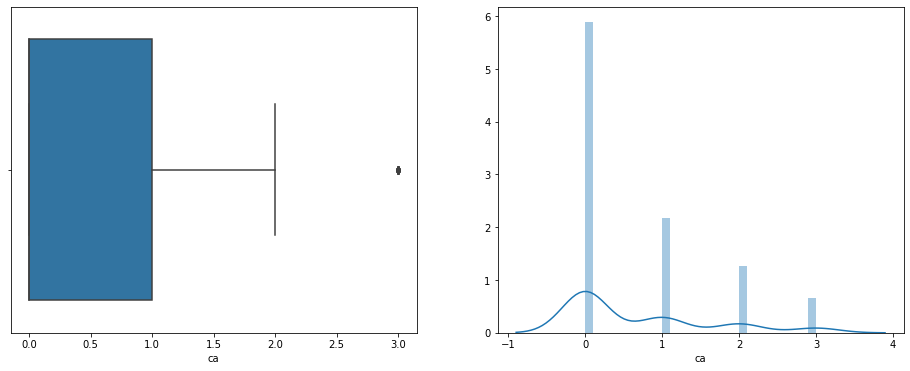

In [140]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data['ca'],ax=ax[0])
sns.distplot(data['ca'],bins=30,ax=ax[1])

plt.show()

## Fill Nas with mode

In [141]:
data.ca.astype('category').value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [142]:
data.thal.astype('category').value_counts()

3.0    166
7.0    117
6.0     18
Name: thal, dtype: int64

In [143]:
data=data.fillna({'ca':0,'thal':'3.0'})

## rechecking NA. 

In [144]:
data.isnull().sum().sum()

0


<p>The full data dictionary is also displayed here.</p>
<p><img src="https://assets.datacamp.com/production/project_445/img/datadict.png" height="500" width="500"></p>

## Checking Data Type if they align with data dictionary

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null float64
thal        303 non-null object
class       303 non-null int64
dtypes: float64(2), int64(11), object(1)
memory usage: 33.2+ KB


In [146]:
## sex,cp, fbs,restecg,exang,slope,class is coming as numberic needs to be converted to category. class value greater than should be converted to 1

In [147]:
data['class']=data['class'].apply(lambda x:1 if x>0 else 0)

In [148]:
data[['sex','cp','fbs','restecg','exang','class']] = data[['sex','cp','fbs','restecg','exang','class']].astype('category')

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null category
cp          303 non-null category
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null category
restecg     303 non-null category
thalach     303 non-null int64
exang       303 non-null category
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null float64
thal        303 non-null object
class       303 non-null category
dtypes: category(6), float64(2), int64(5), object(1)
memory usage: 21.5+ KB


In [150]:
## Checking for data inconsistency as per data table


<p>The full data dictionary is also displayed here.</p>
<p><img src="https://assets.datacamp.com/production/project_445/img/datadict.png" height="500" width="500"></p>

In [151]:
##Age Looks good. No negative value. No unrealistic Value

In [152]:
data['age'].describe()

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [153]:
data['sex'].value_counts()

1    206
0     97
Name: sex, dtype: int64

In [154]:
## Data in 1 is very less. we may need to group them.

In [155]:
data['cp'].value_counts()

4    144
3     86
2     50
1     23
Name: cp, dtype: int64

In [156]:
data['trestbps'].describe()

count    303.000000
mean     131.689769
std       17.599748
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [157]:
data['chol'].describe()

count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: chol, dtype: float64

In [158]:
data['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [159]:
data['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

In [160]:
## restecg has very few values in 1. we would not be able create the sample. can we group?

restecg: resting electrocardiographic results

-- Value 0: normal

-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

In [161]:
# Value 1 & 2 looks like abnormlatity and we group as 1_2.

In [162]:
data['restecg'].value_counts()

0    151
2    148
1      4
Name: restecg, dtype: int64

In [163]:
data['restecg']=data['restecg'].apply(lambda x:'0' if x==0 else '1_2')

In [164]:
data['restecg'].value_counts()

1_2    152
0      151
Name: restecg, dtype: int64

In [165]:
data['thalach'].describe()

count    303.000000
mean     149.607261
std       22.875003
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [166]:
data['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

In [167]:
data['slope'].value_counts()

1    142
2    140
3     21
Name: slope, dtype: int64

In [34]:
data['ca'].describe()

count    303.000000
mean       0.663366
std        0.934375
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: ca, dtype: float64

In [35]:
data['thal'].value_counts()

3.0    166
7.0    117
6.0     18
3.0      2
Name: thal, dtype: int64

In [36]:
data['thal'] = data['thal'].apply(lambda x:str(x).strip())

In [37]:
data['thal'].value_counts()

3.0    168
7.0    117
6.0     18
Name: thal, dtype: int64

## class is well balanced.

In [38]:
data['class'].value_counts()

0    164
1    139
Name: class, dtype: int64

In [39]:
## lets make categorical varaible as strings. only doing it to make data easily transferable to r.

In [40]:
data_cat=data.select_dtypes(exclude=[np.number])

In [41]:
data_cat=data_cat.apply(lambda x:x.apply(lambda y:str(y)+"_"))

In [42]:
data_num=data.select_dtypes(include=[np.number])

In [43]:
data1 = pd.concat([data_cat,data_num],axis=1)

In [44]:
data1.shape

(303, 14)

In [45]:
data1.to_csv('Data/whole_data.csv')

## Univariate analysis and looking for ouliers

In [46]:
data_numeric=data_num

In [47]:
data_numeric.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca'], dtype='object')

In [110]:
data_cluster=pd.concat([data_cat,data_num],axis=1)

## No major skewnees in age

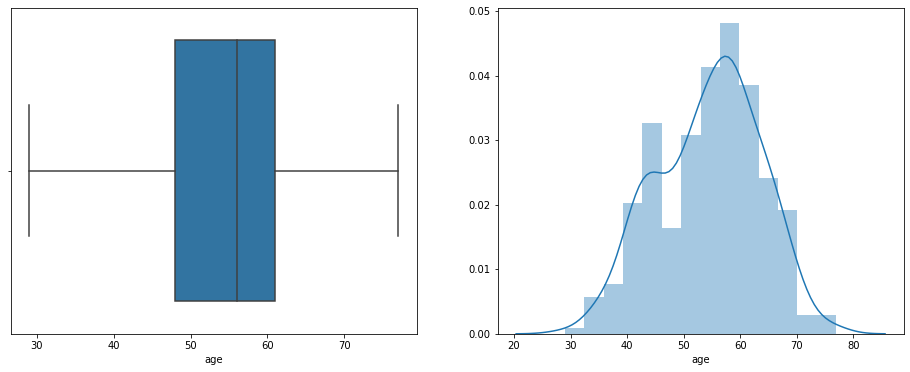

In [169]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['age'],ax=ax[0])
sns.distplot(data_numeric['age'],bins=14,ax=ax[1])

plt.show()

# Slightly Right skewed wih some outliers

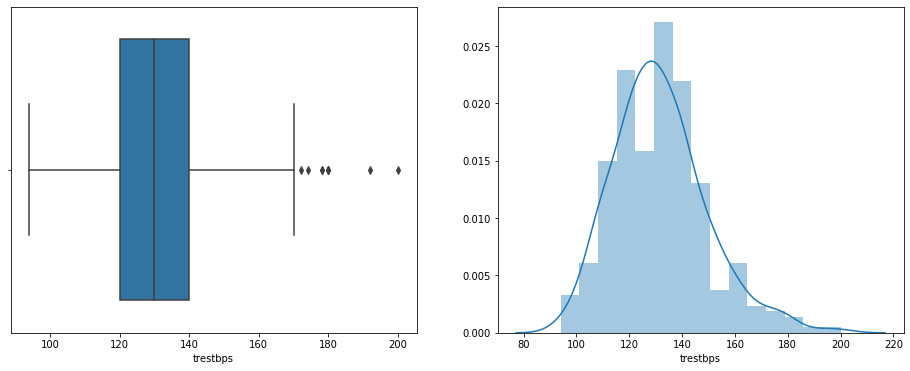

In [56]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['trestbps'],ax=ax[0])
sns.distplot(data_numeric['trestbps'],bins=15,ax=ax[1])

plt.show()

In [64]:
## log decreases the screness. No modification will be done but in residual analysis we will keep this in mind. Only modification will be done during cluster analysis

In [66]:
data_numeric['trestbps'].describe()["75%"]-1.5*(data_numeric['trestbps'].describe()["25%"]-data_numeric['trestbps'].describe()["75%"])

170.0

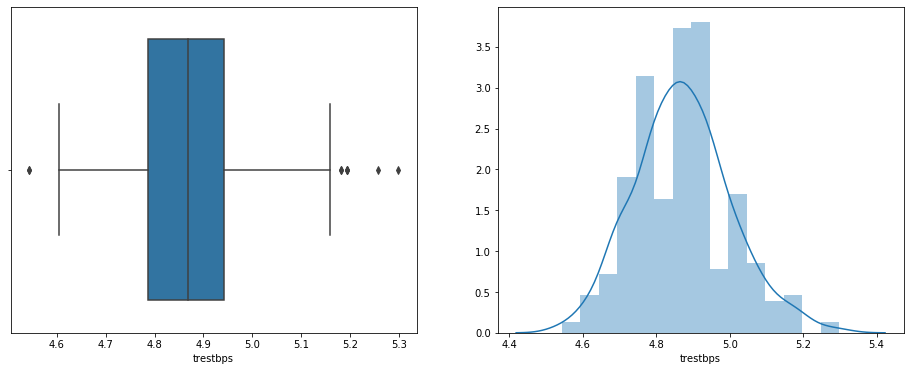

In [63]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(np.log(data_numeric['trestbps']),ax=ax[0])
sns.distplot(np.log(data_numeric['trestbps']),bins=15,ax=ax[1])

plt.show()

In [172]:
data.loc[np.log(data_numeric['trestbps'])<4.6,:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
131,51,1,3,94,227,0,0,154,1,0.0,1,1.0,7,0
222,39,0,3,94,199,0,0,179,0,0.0,1,0.0,3,0


In [173]:
data.loc[np.log(data_numeric['trestbps'])>5.15,:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
83,68,1,3,180,274,1,1_2,150,1,1.6,2,0.0,7,1
126,56,0,4,200,288,1,1_2,133,1,4.0,3,2.0,7,1
172,59,0,4,174,249,0,0,143,1,0.0,2,0.0,3,1
183,59,1,1,178,270,0,1_2,145,0,4.2,3,0.0,7,0
188,54,1,2,192,283,0,1_2,195,0,0.0,1,1.0,7,1
201,64,0,4,180,325,0,0,154,1,0.0,1,0.0,3,0
213,66,0,4,178,228,1,0,165,1,1.0,2,2.0,7,1
231,55,0,4,180,327,0,1_2,117,1,3.4,2,0.0,3,1


In [111]:
data_cluster['trestbps']=np.log(data_cluster['trestbps'])

In [67]:
## checing outliers: 
data[data['trestbps']>170]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
14,52,1,3,172,199,1,0,162,0,0.5,1,0.0,7.0,0
83,68,1,3,180,274,1,1_2,150,1,1.6,2,0.0,7.0,1
126,56,0,4,200,288,1,1_2,133,1,4.0,3,2.0,7.0,1
172,59,0,4,174,249,0,0,143,1,0.0,2,0.0,3.0,1
183,59,1,1,178,270,0,1_2,145,0,4.2,3,0.0,7.0,0
188,54,1,2,192,283,0,1_2,195,0,0.0,1,1.0,7.0,1
201,64,0,4,180,325,0,0,154,1,0.0,1,0.0,3.0,0
213,66,0,4,178,228,1,0,165,1,1.0,2,2.0,7.0,1
231,55,0,4,180,327,0,1_2,117,1,3.4,2,0.0,3.0,1


In [ ]:
## Right skewed. Log make it much better but no change will be done now. will only be done for cluster analysis

In [68]:
data_numeric.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca'], dtype='object')

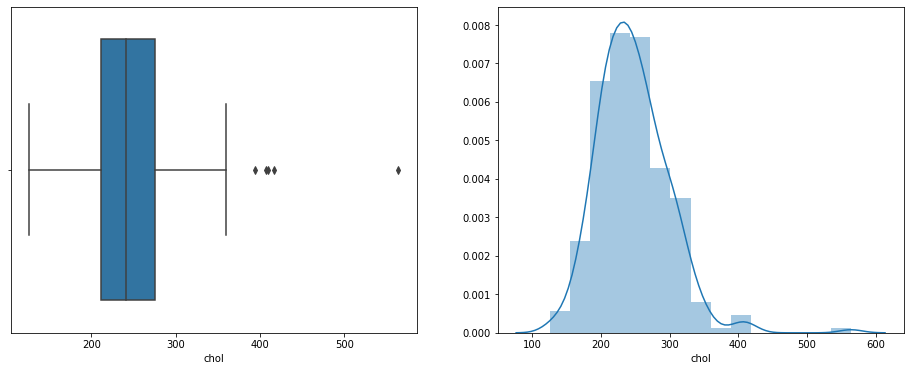

In [70]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['chol'],ax=ax[0])
sns.distplot(data_numeric['chol'],bins=15,ax=ax[1])

plt.show()

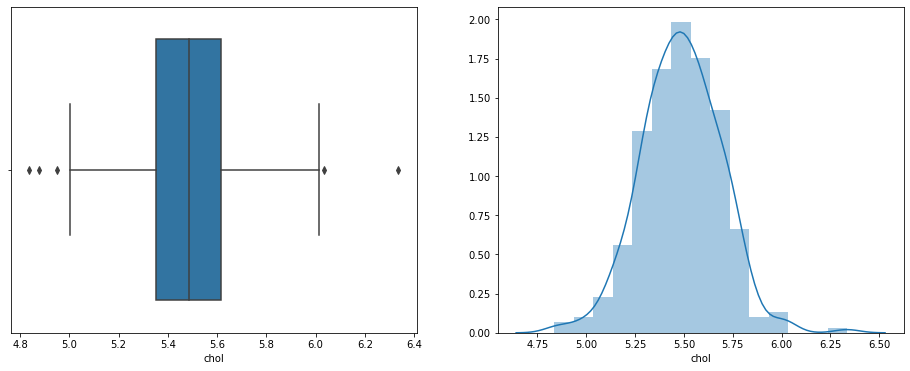

In [71]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(np.log(data_numeric['chol']),ax=ax[0])
sns.distplot(np.log(data_numeric['chol']),bins=15,ax=ax[1])

plt.show()

In [175]:
data.loc[np.log(data_numeric['chol'])<5,:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
93,44,0,3,108,141,0,0,175,0,0.6,2,0.0,3,0
202,57,1,3,150,126,1,0,173,0,0.2,1,1.0,7,0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7,1


In [177]:
data.loc[np.log(data_numeric['chol'])>6,:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
48,65,0,3,140,417,1,1_2,157,0,0.8,1,1.0,3,0
121,63,0,4,150,407,0,1_2,154,0,4.0,2,3.0,7,1
152,67,0,3,115,564,0,1_2,160,0,1.6,2,0.0,7,0
181,56,0,4,134,409,0,1_2,150,1,1.9,2,2.0,7,1


In [112]:
data_cluster['chol']=np.log(data_cluster['chol'])

In [81]:
## left skewed. sqaure make its good. no change in data. will keep in mind for mater analysis

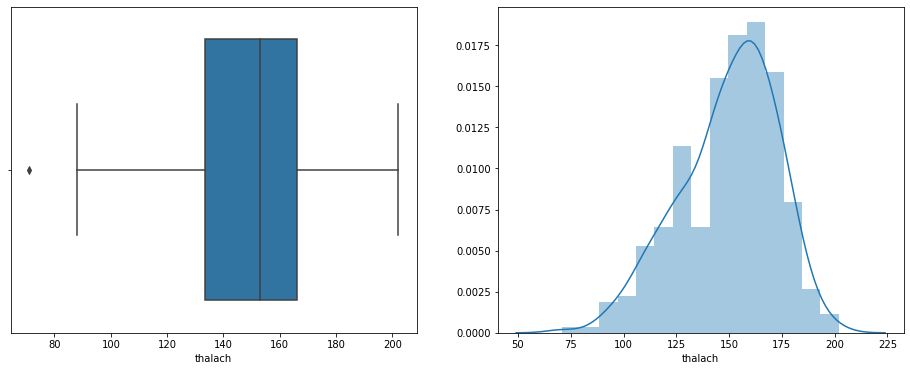

In [72]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['thalach'],ax=ax[0])
sns.distplot(data_numeric['thalach'],bins=15,ax=ax[1])

plt.show()

In [178]:
data[data['thalach']<80]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
245,67,1,4,120,237,0,0,71,0,1.0,2,0.0,3,1


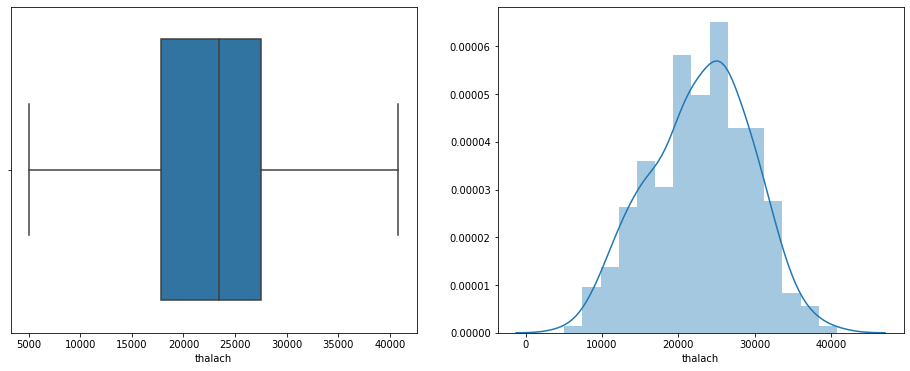

In [80]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(np.power(data_numeric['thalach'],2),ax=ax[0])
sns.distplot(np.power(data_numeric['thalach'],2),bins=15,ax=ax[1])

plt.show()

In [113]:
data_cluster['thalach']=np.power(data_numeric['thalach'],2)

In [82]:
data_numeric.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca'], dtype='object')

## Right skrewd most data under zero. if convert to log or inverse ofsqaure we geta bi bimodal relation ship.

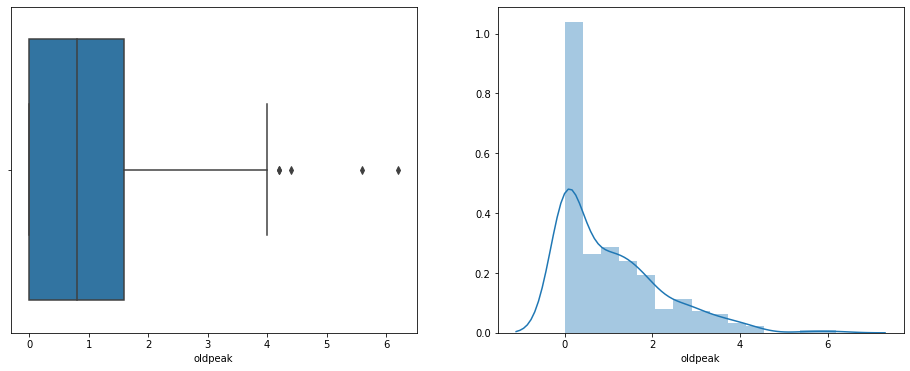

In [83]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['oldpeak'],ax=ax[0])
sns.distplot(data_numeric['oldpeak'],bins=15,ax=ax[1])

plt.show()

In [179]:
data[data['oldpeak']>4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
91,62,0,4,160,164,0,1_2,145,0,6.2,3,3.0,7,1
123,55,1,4,140,217,0,0,111,1,5.6,3,0.0,7,1
183,59,1,1,178,270,0,1_2,145,0,4.2,3,0.0,7,0
191,51,1,4,140,298,0,0,122,1,4.2,2,3.0,7,1
285,58,1,4,114,318,0,1_2,140,0,4.4,3,3.0,6,1


In [114]:
data_cluster['oldpeak']=np.power(data_numeric['oldpeak']+0.1,-2)

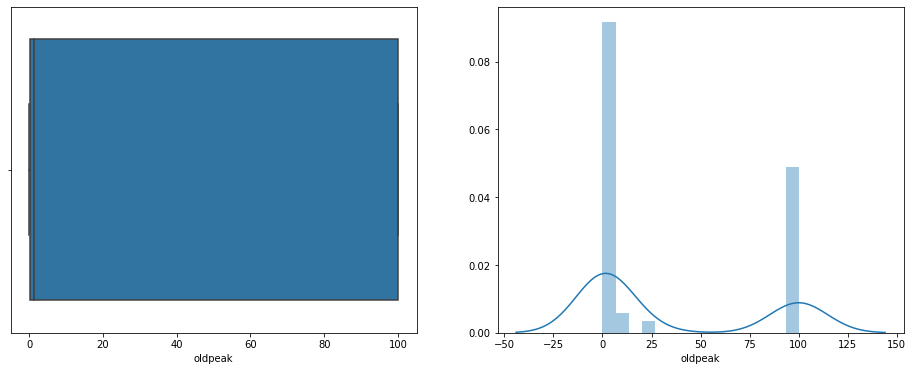

In [98]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(np.power(data_numeric['oldpeak']+0.1,-2),ax=ax[0])
sns.distplot(np.power(data_numeric['oldpeak']+0.1,-2),bins=15,ax=ax[1])

plt.show()

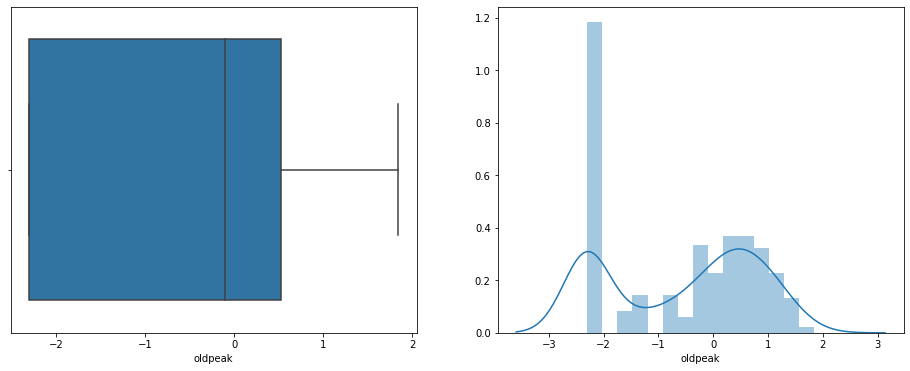

In [99]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(np.log(data_numeric['oldpeak']+0.1),ax=ax[0])
sns.distplot(np.log(data_numeric['oldpeak']+0.1),bins=15,ax=ax[1])

plt.show()

In [ ]:
# looks like a categorical variable

In [101]:
data['slope'].value_counts()

1    142
2    140
3     21
Name: slope, dtype: int64

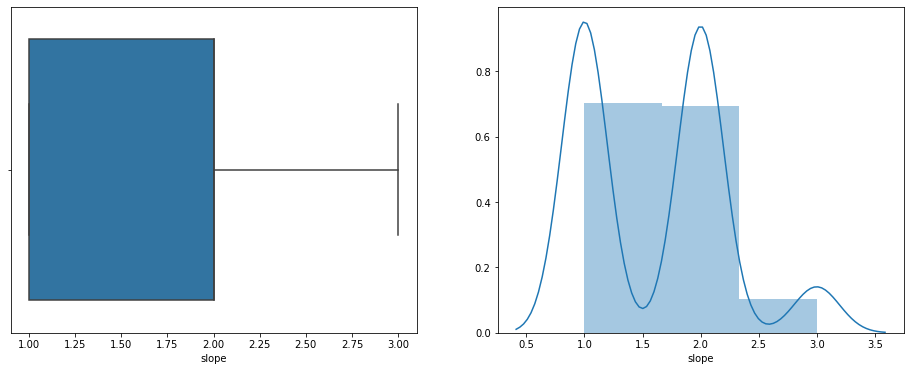

In [105]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['slope'],ax=ax[0])
sns.distplot(data_numeric['slope'],bins=3,ax=ax[1])

plt.show()

In [102]:
data['ca'].value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

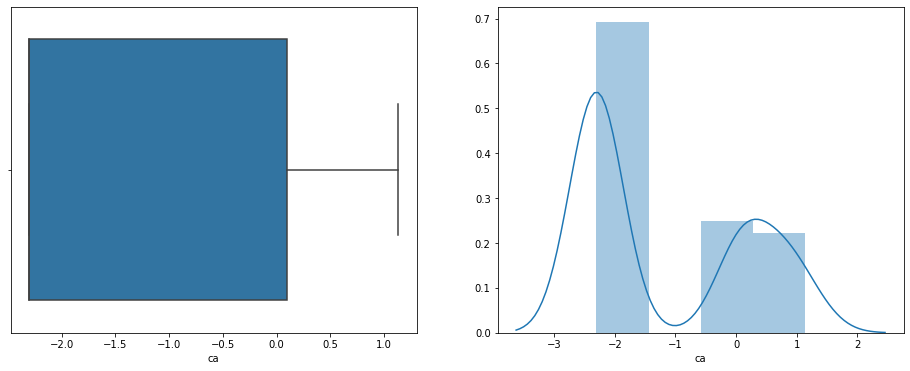

In [108]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(np.log(data_numeric['ca']+0.1),ax=ax[0])
sns.distplot(np.log(data_numeric['ca']+0.1),bins=4,ax=ax[1])

plt.show()

In [109]:
# we wont do any transformation before fitting the logistice mod1. but we will do transformation for cluster analysis

In [116]:
from sklearn.datasets import load_iris
from sklearn import preprocessing

In [125]:
data_num.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca'], dtype='object')

In [126]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data_cluster[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']])
df = pd.DataFrame(x_scaled)

In [128]:
df.columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']

In [130]:
data_cluster[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']] = df

In [133]:
data_cluster.to_csv('Data/cluster_data.csv')

## Next Clustering Analysis in R using grower distnace exluding class.